In [15]:
import pandas as pd
import matplotlib 
import matplotlib.pyplot as  plt
import seaborn as sns
import os
import glob
import os.path
from os import path

In [3]:
net_list = []
with open("networks_analysis_B/task.list", 'r') as task_f:   #open pdbs found in this folder
    for line in task_f:
        line = line.strip()
        net_list.append(line)
    #import the pdbs into the notebook, one at a time

In [4]:
dsc = pd.DataFrame()
for item in net_list:
    description = item
    pdb_file = "networks_analysis_B/" + item + ".pdb"   #change this to the folder where the pdbs are found
    score = {}
#    labels = []
    pose_energy = []
    hbnet = []
    hbnet_pdb = "networks_analysis_B/" + item + "/" + item + "_0001.pdb"
    if os.path.isfile(hbnet_pdb):
        with open(pdb_file, 'r') as score_f:
            for line in score_f:
                if line.startswith("#BEGIN_POSE_ENERGIES_TABLE"):
                    break
            for line in score_f:
                if line.startswith("label"):
                    labels = line.strip().split(' ')
                elif line.startswith("pose"):
                    pose_energy = line.strip().split(' ')
                    for i in range(1, len(labels)):
                        score[labels[i]] = float(pose_energy[i])
                    break
#                    labels = next(score_f).strip().split(' ')
#                    next(score_f)
#                    pose_energy = score_f.readline().strip().split(' ')
#                    for i in range(1, len(labels)):
#                        score[labels[i]] = float(pose_energy[i])
#                    for line in score_f:
#                        if "pore" in line:
#                            score['sasa'] = float(line.split(" ")[1])
#                        elif "gly_holes_atm" in line:
#                            score['gly_holes_atm'] = float(line.split(" ")[1])
#                        elif "gly_holes_res" in line:
#                            score['gly_holes_res'] = float(line.split(" ")[1])
#                        elif "sc_buns_hbnetA" in line:
#                            score['sc_heavy_unsat'] = float(line.split(" ")[1])
#                        elif "network_holes_atm" in line:
#                            score['network_holes_atm'] = float(line.split(" ")[1])
#                        elif "network_holes_res" in line:
#                            score['network_holes_res'] = float(line.split(" ")[1])
        score["description"] = description
        with open(hbnet_pdb, 'r') as hbnet_f:
            for line in hbnet_f:
                if "REMARK PDBinfo-LABEL:" in line and " HBNet" in line:
                    hbnet_res = int(line[21:26])
                    hbnet.append(hbnet_res)
        score["hbnet"] = hbnet
        score["n_hbnet"] = len(hbnet)      #specify on what position the tyrosine resiudes are
        if 10 in score["hbnet"]:           #in this case there should be three 
            score["hbnet_tyr10"] = True    
        else:
            score["hbnet_tyr10"] = False
        if 96 in score["hbnet"]:
            score["hbnet_tyr96"] = True     #this also imports the metrics table at the end of the pdb file
        else:                                #this specifies the number of hb_net found in the structure
            score["hbnet_tyr96"] = False
        dsc = dsc.append(score, ignore_index=True)
    else:
        print(pdb_file)
print(dsc)

networks_analysis_B/0_input_0093_0003_10_0009_0006_0005.pdb
networks_analysis_B/0_input_0093_0005_11_0006_0006_0001.pdb
networks_analysis_B/0_input_0093_0005_14_0008_0003_0010.pdb
networks_analysis_B/102_input_0001_0002_14_0010_0001_0005.pdb
networks_analysis_B/102_input_0023_0004_10_0001_0003.pdb
networks_analysis_B/102_input_0023_0004_10_0005_0010_0005.pdb
networks_analysis_B/102_input_0023_0004_10_0005_0010_0006.pdb
networks_analysis_B/102_input_0023_0004_10_0005_0010_0010.pdb
networks_analysis_B/102_input_0023_0004_10_0005_0010.pdb
networks_analysis_B/102_input_0023_0004_10_0006_0002_0001.pdb
networks_analysis_B/102_input_0023_0004_10_0006_0002.pdb
networks_analysis_B/102_input_0023_0004_10_0007_0007_0003.pdb
networks_analysis_B/102_input_0023_0004_10_0007_0007_0004.pdb
networks_analysis_B/102_input_0023_0004_10_0007_0007_0007.pdb
networks_analysis_B/102_input_0023_0004_10_0008_0006_0008.pdb
networks_analysis_B/102_input_0023_0004_10_0008_0006.pdb
networks_analysis_B/102_input_0023

networks_analysis_B/16_input_0002_0003_6_0003_0003_0007.pdb
networks_analysis_B/16_input_0002_0003_6_0004_0003_0006.pdb
networks_analysis_B/16_input_0002_0003_6_0004_0003_0007.pdb
networks_analysis_B/16_input_0002_0003_6_0006_0010_0007.pdb
networks_analysis_B/16_input_0002_0003_6_0007_0005_0007.pdb
networks_analysis_B/16_input_0002_0003_6_0007_0005.pdb
networks_analysis_B/16_input_0002_0003_6_0008_0007_0007.pdb
networks_analysis_B/16_input_0002_0003_6_0008_0007_0009.pdb
networks_analysis_B/16_input_0002_0003_6_0008_0007.pdb
networks_analysis_B/16_input_0002_0003_6_0009_0009_0007.pdb
networks_analysis_B/16_input_0002_0003_6_0010_0010_0003.pdb
networks_analysis_B/16_input_0002_0003_7_0002_0007_0007.pdb
networks_analysis_B/16_input_0002_0003_7_0003_0006_0007.pdb
networks_analysis_B/16_input_0002_0003_7_0006_0004_0007.pdb
networks_analysis_B/16_input_0002_0003_7_0007_0003_0007.pdb
networks_analysis_B/16_input_0002_0003_8_0004_0003_0007.pdb
networks_analysis_B/16_input_0002_0003_8_0004_0003

networks_analysis_B/16_input_0021_0004_8_0009_0007_0006.pdb
networks_analysis_B/16_input_0021_0004_8_0009_0007_0007.pdb
networks_analysis_B/16_input_0021_0005_10_0001_0002_0007.pdb
networks_analysis_B/16_input_0021_0005_10_0004_0010_0007.pdb
networks_analysis_B/16_input_0021_0005_10_0005_0007_0007.pdb
networks_analysis_B/16_input_0021_0005_10_0006_0005_0004.pdb
networks_analysis_B/16_input_0021_0005_10_0006_0005_0007.pdb
networks_analysis_B/16_input_0021_0005_12_0010_0008_0007.pdb
networks_analysis_B/16_input_0021_0005_13_0001_0009_0007.pdb
networks_analysis_B/16_input_0021_0005_13_0001_0009.pdb
networks_analysis_B/16_input_0021_0005_13_0005_0010_0007.pdb
networks_analysis_B/16_input_0021_0005_14_0001_0003_0007.pdb
networks_analysis_B/16_input_0021_0005_14_0003_0006_0007.pdb
networks_analysis_B/16_input_0021_0005_14_0005_0010_0007.pdb
networks_analysis_B/16_input_0021_0005_15_0002_0009_0003.pdb
networks_analysis_B/16_input_0021_0005_15_0002_0009_0005.pdb
networks_analysis_B/16_input_00

In [5]:
dsc["hbnet_tyrs"] = dsc["hbnet_tyr10"] + dsc["hbnet_tyr96"]

In [6]:
dsc.to_pickle('scores.pickle')

In [3]:
dsc = pd.read_pickle('scores.pickle')

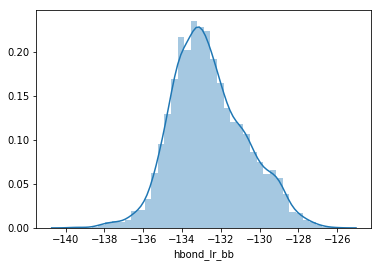

In [7]:
sns.distplot(dsc["hbond_lr_bb"], bins=40)    #display the hbond_lr_bb metrics

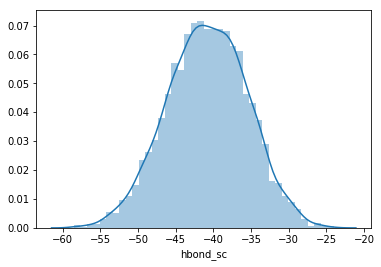

In [8]:
sns.distplot(dsc["hbond_sc"], bins=40)    #display the hbond_sc metrics

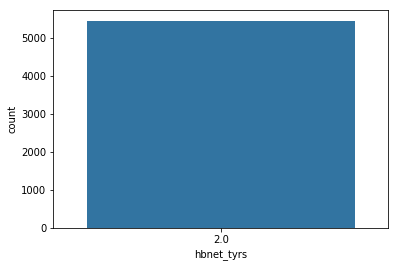

In [9]:
sns.countplot(dsc["hbnet_tyrs"])

In [10]:
dsc_complete = dsc.loc[dsc["hbnet_tyrs"] == 2]    #make sure that there are 2 tyrosines making the network
dsc_complete

,angle_constraint,atom_pair_constraint,description,dihedral_constraint,dslf_fa13,fa_atr,fa_dun,fa_elec,fa_intra_rep,fa_intra_sol_xover4,...,lk_ball_wtd,n_hbnet,omega,p_aa_pp,pro_close,rama_prepro,ref,total,yhh_planarity,hbnet_tyrs
0,0.0,0.00000,0_input_0042_0002_6_0001_0003_0006,0.53127,0.0,-922.315,188.900,-701.294,1.93793,27.6572,...,11.30280,16.0,20.3187,-59.8683,1.02038,0.54789,36.3038,-907.728,0.19210,2.0
1,NaN,NaN,0_input_0042_0002_6_0001_0003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
2,0.0,0.00000,0_input_0042_0002_6_0005_0009_0002,0.86102,0.0,-933.345,194.695,-690.916,2.01559,29.9711,...,15.16400,10.0,20.4717,-61.4267,1.34826,4.35714,32.5799,-906.425,0.46270,2.0
3,0.0,0.00000,0_input_0042_0002_6_0005_0009_0006,1.09732,0.0,-932.549,178.982,-631.137,2.05853,26.9224,...,11.43090,9.0,18.9328,-66.1129,1.41869,1.85318,57.3282,-904.643,0.04915,2.0
4,0.0,0.00000,0_input_0042_0002_6_0005_0009_0008,0.98178,0.0,-937.522,195.930,-669.045,2.05667,28.5397,...,10.93050,9.0,20.0798,-62.5694,1.34070,1.71495,37.6665,-913.232,0.04935,2.0
5,NaN,NaN,0_input_0042_0002_6_0005_0009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
6,0.0,0.00000,0_input_0042_0002_6_0008_0005_0003,0.91333,0.0,-923.668,174.415,-650.493,2.04426,26.5111,...,14.21490,17.0,20.1963,-63.3926,1.19173,5.63460,56.3979,-905.295,0.09847,2.0
7,0.0,0.00000,0_input_0042_0002_6_0008_0005_0005,0.65864,0.0,-912.340,178.067,-679.068,2.02004,26.6455,...,16.59370,14.0,20.3773,-59.0963,1.30459,6.43620,42.0430,-905.641,0.10916,2.0
8,0.0,0.00000,0_input_0042_0002_6_0008_0005_0006,0.93331,0.0,-935.024,188.394,-675.447,2.04089,27.3575,...,12.50290,15.0,20.4791,-59.4375,1.20066,4.28918,46.4825,-905.376,0.23425,2.0
9,NaN,NaN,0_input_0042_0002_6_0008_0005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0


In [16]:
dhbnet = pd.DataFrame()
for item in net_list:
    for file in glob.glob("networks_analysis_B/"+item+"/*_nativenetwork_*.pdb"):
        net_score = {}
        net_res = []
        cst_file = file.replace('nativenetwork', 'native_network')
        cst_file = cst_file.replace('pdb', 'cst')
        cst = ""
        n_hbonds = 0
        net_score["net_tyr10"] = False
        net_score["net_tyr96"] = False
        with open(file, 'r') as in_net:
            for line in in_net:
                if "ATOM " in line:
                    res_num = int(line.split()[5])
                    res_name = line.split()[3]
                    if res_name not in ["ALA","GLY","PRO"] and res_num not in net_res:
                        net_res.append(res_num)
                    if res_name == "TYR" and res_num == 10:
                        net_score["net_tyr10"] = True
                    elif res_name == "TYR" and res_num == 96:
                        net_score["net_tyr96"] = True
                elif "HBNet_NumUnsatHpol" in line:
                    net_score["HBNet_NumUnsatHpol"] = float(line.split(" ")[1])
                elif "HBNet_Saturation" in line:   #imports the HBNet_saturation from the cst file
                    net_score["HBNet_saturation"] = float(line.split(" ")[1])
                elif "HBNet_Score" in line:  #imports the HBNet_score from the cst file
                    net_score["HBNet_Score"] = float(line.split(" ")[1])
        if path.exists(cst_file): 
            with open(cst_file, 'r') as cst_i:
                for line in cst_i:
                    if "AtomPair" in line:
                        cst += line[1:]
                        n_hbonds += 1
                    else:
                        cst += line
        net_score["description"] = item
        net_score["network"] = net_res
        net_score["n_res_network"] = len(net_res)
        net_score["network_cst"] = cst
        net_score["n_hbonds"] = n_hbonds
#        if 10 in net_score["network"]:
#            net_score["net_tyr10"] = True
#        else:
#            net_score["net_tyr10"] = False
#        if 68 in net_score["network"]:
#            net_score["net_tyr68"] = True
#        else:
#            net_score["net_tyr68"] = False
        dhbnet = dhbnet.append(net_score, ignore_index=True)
print(dhbnet)

       HBNet_NumUnsatHpol  HBNet_Score  HBNet_saturation  \
0                     0.0     -3.65199          0.500000   
1                     0.0     -3.07994          0.533333   
2                     0.0     -3.02154          0.450000   
3                     0.0     -2.48738          0.600000   
4                     0.0     -3.01013          0.500000   
5                     0.0     -3.21010          0.466667   
6                     0.0     -3.34088          0.333333   
7                     0.0     -2.62652          0.500000   
8                     0.0     -3.48590          0.333333   
9                     0.0     -2.77024          0.500000   
10                    0.0     -3.50447          0.333333   
11                    0.0     -2.72126          0.500000   
12                    0.0     -3.30970          0.466667   
13                    0.0     -4.02415          0.590909   
14                    0.0     -3.97535          0.333333   
15                    1.0     -3.35002  

In [17]:
dhbnet["tyrs"] = dhbnet["net_tyr10"] + dhbnet["net_tyr96"]
dhbnet["saturation"] = dhbnet["n_hbonds"]/dhbnet["n_res_network"]
print(dhbnet)

       HBNet_NumUnsatHpol  HBNet_Score  HBNet_saturation  \
0                     0.0     -3.65199          0.500000   
1                     0.0     -3.07994          0.533333   
2                     0.0     -3.02154          0.450000   
3                     0.0     -2.48738          0.600000   
4                     0.0     -3.01013          0.500000   
5                     0.0     -3.21010          0.466667   
6                     0.0     -3.34088          0.333333   
7                     0.0     -2.62652          0.500000   
8                     0.0     -3.48590          0.333333   
9                     0.0     -2.77024          0.500000   
10                    0.0     -3.50447          0.333333   
11                    0.0     -2.72126          0.500000   
12                    0.0     -3.30970          0.466667   
13                    0.0     -4.02415          0.590909   
14                    0.0     -3.97535          0.333333   
15                    1.0     -3.35002  

In [18]:
dhbnet.to_pickle('networks.pickle')

In [4]:
dhbnet = pd.read_pickle('networks.pickle')

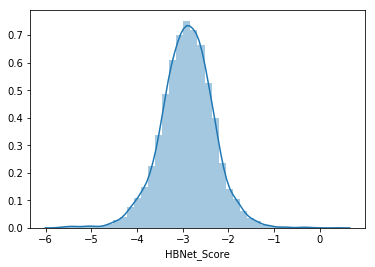

In [19]:
# select based on the quality of the network: good hbond_sc, n_hbonds, presence of 10 or 68, good network energy.
sns.distplot(dhbnet["HBNet_Score"], bins=40)

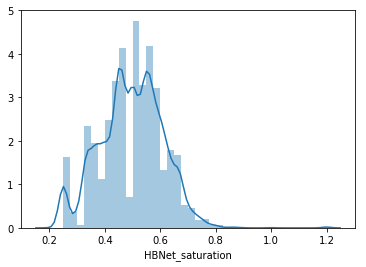

In [20]:
sns.distplot(dhbnet["HBNet_saturation"], bins=40)   #all of the below are graphs represeting the imported data from the metrics

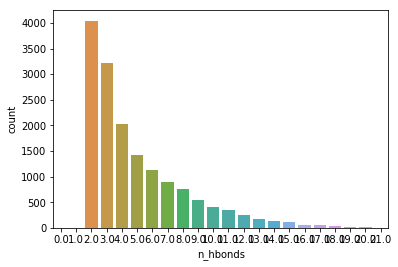

In [21]:
sns.countplot(dhbnet["n_hbonds"])

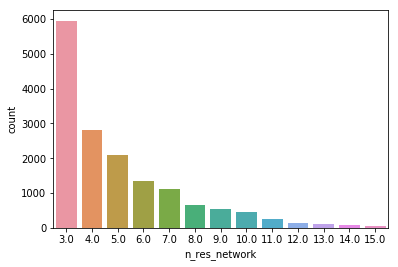

In [22]:
sns.countplot(dhbnet["n_res_network"])

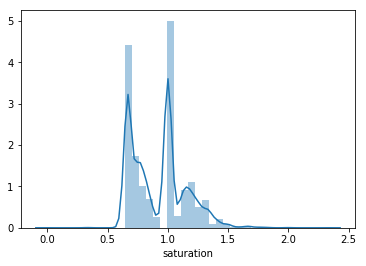

In [23]:
sns.distplot(dhbnet["saturation"], bins=40)

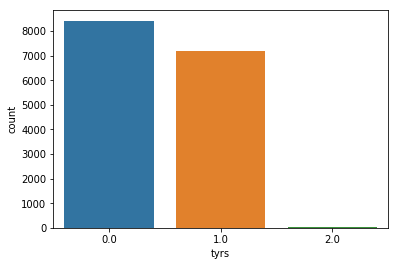

In [24]:
sns.countplot(dhbnet["tyrs"])

In [25]:
dhbnet_tyrs = dhbnet.loc[(dhbnet["net_tyr10"] == True) | (dhbnet["net_tyr96"] == True) ]
dhbnet_tyrs

,HBNet_NumUnsatHpol,HBNet_Score,HBNet_saturation,description,n_hbonds,n_res_network,net_tyr10,net_tyr96,network,network_cst,tyrs,saturation
0,0.0,-3.65199,0.500000,0_input_0042_0002_6_0001_0003_0006,4.0,5.0,1.0,0.0,"[10, 12, 22, 24, 170]",# 0_input_0042_0002_6_0001_0003_0006_0001_nati...,1.0,0.800000
2,0.0,-3.02154,0.450000,0_input_0042_0002_6_0001_0003_0006,5.0,6.0,0.0,1.0,"[82, 96, 114, 128, 130, 146]",# 0_input_0042_0002_6_0001_0003_0006_0001_nati...,1.0,0.833333
5,0.0,-3.21010,0.466667,0_input_0042_0002_6_0001_0003,4.0,5.0,0.0,1.0,"[82, 96, 114, 128, 130]",# 0_input_0042_0002_6_0001_0003_0001_native_ne...,1.0,0.800000
6,0.0,-3.34088,0.333333,0_input_0042_0002_6_0005_0009_0002,2.0,3.0,1.0,0.0,"[10, 24, 52]",# 0_input_0042_0002_6_0005_0009_0002_0001_nati...,1.0,0.666667
7,0.0,-2.62652,0.500000,0_input_0042_0002_6_0005_0009_0002,6.0,7.0,0.0,1.0,"[82, 96, 98, 114, 118, 128, 130]",# 0_input_0042_0002_6_0005_0009_0002_0001_nati...,1.0,0.857143
8,0.0,-3.48590,0.333333,0_input_0042_0002_6_0005_0009_0006,2.0,3.0,1.0,0.0,"[10, 24, 52]",# 0_input_0042_0002_6_0005_0009_0006_0001_nati...,1.0,0.666667
9,0.0,-2.77024,0.500000,0_input_0042_0002_6_0005_0009_0006,5.0,6.0,0.0,1.0,"[82, 96, 98, 114, 128, 130]",# 0_input_0042_0002_6_0005_0009_0006_0001_nati...,1.0,0.833333
10,0.0,-3.50447,0.333333,0_input_0042_0002_6_0005_0009_0008,2.0,3.0,1.0,0.0,"[10, 24, 52]",# 0_input_0042_0002_6_0005_0009_0008_0001_nati...,1.0,0.666667
11,0.0,-2.72126,0.500000,0_input_0042_0002_6_0005_0009_0008,5.0,6.0,0.0,1.0,"[82, 96, 98, 114, 128, 130]",# 0_input_0042_0002_6_0005_0009_0008_0001_nati...,1.0,0.833333
12,0.0,-3.30970,0.466667,0_input_0042_0002_6_0005_0009,4.0,5.0,0.0,1.0,"[82, 96, 114, 128, 130]",# 0_input_0042_0002_6_0005_0009_0001_native_ne...,1.0,0.800000


In [26]:
df = pd.merge(dsc, dhbnet_tyrs, how='left', on=['description'])
print(df)

      angle_constraint  atom_pair_constraint  \
0                  0.0               0.00000   
1                  0.0               0.00000   
2                  NaN                   NaN   
3                  0.0               0.00000   
4                  0.0               0.00000   
5                  0.0               0.00000   
6                  0.0               0.00000   
7                  0.0               0.00000   
8                  0.0               0.00000   
9                  NaN                   NaN   
10                 0.0               0.00000   
11                 0.0               0.00000   
12                 0.0               0.00000   
13                 0.0               0.00000   
14                 0.0               0.00000   
15                 0.0               0.00000   
16                 NaN                   NaN   
17                 0.0               0.00000   
18                 0.0               0.00000   
19                 0.0               0.0

In [27]:
df.to_pickle('all_designs.pickle')

In [5]:
df = pd.read_pickle("all_designs.pickle")

In [30]:
dpicked = df.loc[ (df["HBNet_Score"] < -2.5) & (df["saturation"] >= 0.9) & (df["n_res_network"] > 3.0)]
dpicked.shape

(3231, 40)

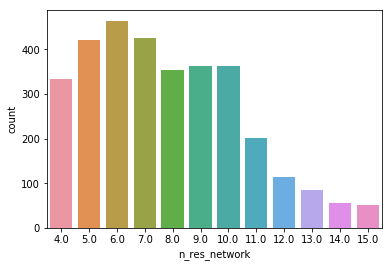

In [31]:
sns.countplot(dpicked["n_res_network"])

In [32]:
len(dpicked.description.unique())

2742

In [33]:
dcount = dpicked.groupby(by=["description"]).count()
dcount
#dcount.loc[dcount["fa_dun"] == 2]

,angle_constraint,atom_pair_constraint,dihedral_constraint,dslf_fa13,fa_atr,fa_dun,fa_elec,fa_intra_rep,fa_intra_sol_xover4,fa_rep,...,HBNet_Score,HBNet_saturation,n_hbonds,n_res_network,net_tyr10,net_tyr96,network,network_cst,tyrs,saturation
description,,,,,,,,,,,,,,,,,,,,,
0_input_0042_0002_6_0008_0005_0003,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
0_input_0042_0002_6_0008_0005_0005,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
0_input_0042_0002_6_0008_0005_0006,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
0_input_0042_0002_9_0009_0004_0003,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
0_input_0042_0002_9_0009_0004_0005,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
0_input_0042_0002_9_0009_0004_0008,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
0_input_0093_0003_10_0001_0004,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
0_input_0093_0003_10_0001_0004_0007,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
0_input_0093_0003_10_0002_0007_0003,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


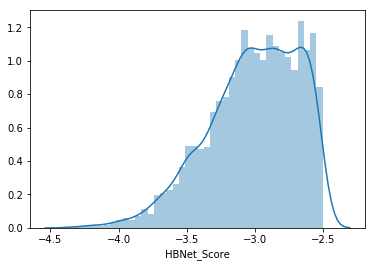

In [34]:
sns.distplot(dpicked["HBNet_Score"], bins=40)

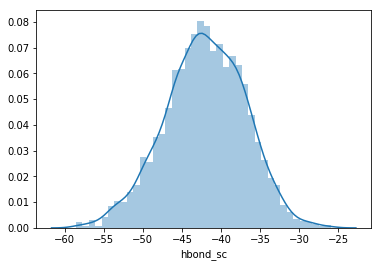

In [35]:
sns.distplot(dpicked["hbond_sc"], bins=40)

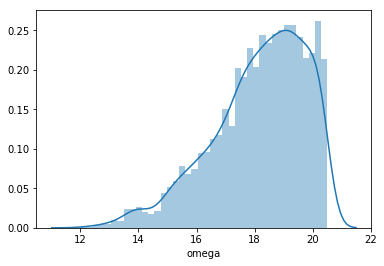

In [36]:
sns.distplot(dpicked["omega"], bins=40)

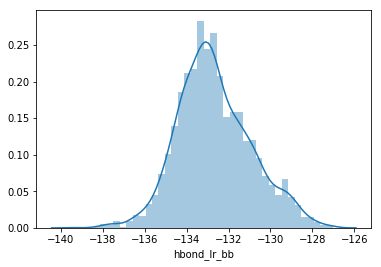

In [37]:
sns.distplot(dpicked["hbond_lr_bb"], bins=40)

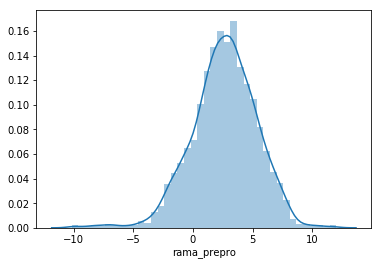

In [38]:
sns.distplot(dpicked["rama_prepro"], bins=40)

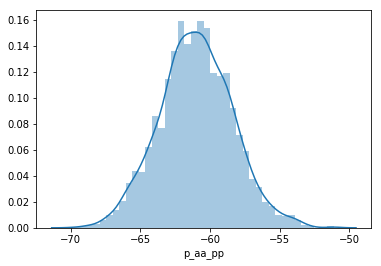

In [39]:
sns.distplot(dpicked["p_aa_pp"], bins=40)

In [40]:
dpicked.description.unique()

array(['0_input_0042_0002_6_0008_0005_0003',
       '0_input_0042_0002_6_0008_0005_0005',
       '0_input_0042_0002_6_0008_0005_0006', ...,
       '28_input_0017_0005_8_0001_0003_0002',
       '2_input_0005_0003_7_0001_0003_0006',
       '2_input_0005_0003_7_0001_0003_0007'], dtype=object)

In [41]:
from shutil import copyfile

for model in dpicked.description:
    pdb = model + ".pdb"
    final_model = model + ".pdb"
    source = "networks_analysis_B/" + pdb
    target = "round3_surf_B/" + final_model
    copyfile(source, target)

In [42]:
dpicked["network_name"] = dpicked["network_cst"].str.split("#")
print(dpicked)

      angle_constraint  atom_pair_constraint  \
10                 0.0               0.00000   
13                 0.0               0.00000   
14                 0.0               0.00000   
17                 0.0               0.00000   
20                 0.0               0.00000   
21                 0.0               0.00000   
23                 0.0               0.00000   
25                 0.0               0.00541   
26                 0.0               0.00541   
27                 NaN                   NaN   
28                 NaN                   NaN   
33                 0.0               0.04326   
35                 0.0               0.06291   
49                 0.0               0.00893   
50                 0.0               0.00008   
51                 0.0               0.00966   
52                 0.0               0.00966   
54                 0.0               0.01624   
56                 0.0               0.00422   
59                 0.0               0.0

/Users/anastassiavorobieva/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [43]:
dpicked["tyr10_n_res"] = dpicked["n_res_network"] * dpicked["net_tyr10"]
dpicked["tyr10_n_hbond"] = dpicked["n_hbonds"] * dpicked["net_tyr10"]
dpicked["tyr96_n_res"] = dpicked["n_res_network"] * dpicked["net_tyr96"]
dpicked["tyr96_n_hbond"] = dpicked["n_hbonds"] * dpicked["net_tyr96"]

/Users/anastassiavorobieva/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/anastassiavorobieva/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/anastassiavorobieva/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

In [44]:
print(dpicked)

      angle_constraint  atom_pair_constraint  \
10                 0.0               0.00000   
13                 0.0               0.00000   
14                 0.0               0.00000   
17                 0.0               0.00000   
20                 0.0               0.00000   
21                 0.0               0.00000   
23                 0.0               0.00000   
25                 0.0               0.00541   
26                 0.0               0.00541   
27                 NaN                   NaN   
28                 NaN                   NaN   
33                 0.0               0.04326   
35                 0.0               0.06291   
49                 0.0               0.00893   
50                 0.0               0.00008   
51                 0.0               0.00966   
52                 0.0               0.00966   
54                 0.0               0.01624   
56                 0.0               0.00422   
59                 0.0               0.0

In [45]:
dcst = dpicked.groupby('description')[['tyrs','n_res_network','n_hbonds','network_cst']].apply(lambda x: x.sum())
print(dcst)

                                      tyrs  n_res_network  n_hbonds  \
description                                                           
0_input_0042_0002_6_0008_0005_0003     1.0            6.0       7.0   
0_input_0042_0002_6_0008_0005_0005     1.0           10.0      11.0   
0_input_0042_0002_6_0008_0005_0006     1.0            4.0       4.0   
0_input_0042_0002_9_0009_0004_0003     1.0            6.0       6.0   
0_input_0042_0002_9_0009_0004_0005     2.0           19.0      21.0   
0_input_0042_0002_9_0009_0004_0008     1.0            6.0       6.0   
0_input_0093_0003_10_0001_0004         2.0           17.0      18.0   
0_input_0093_0003_10_0001_0004_0007    2.0           19.0      22.0   
0_input_0093_0003_10_0002_0007_0003    1.0            9.0      10.0   
0_input_0093_0003_10_0002_0007_0005    1.0           10.0      12.0   
0_input_0093_0003_10_0003_0010_0003    1.0           10.0      13.0   
0_input_0093_0003_10_0003_0010_0004    1.0           14.0      15.0   
0_inpu

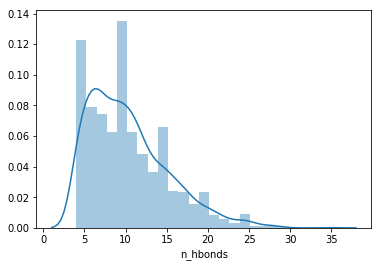

In [46]:
sns.distplot(dcst["n_hbonds"], bins=25)

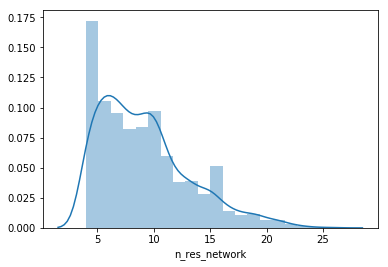

In [47]:
sns.distplot(dcst["n_res_network"], bins=20)

In [48]:
dcst.to_pickle('picked_networks.pickle')